In [1]:
#!pip install sodapy

# Datasets

In [2]:
import pandas as pd
from sodapy import Socrata

- neighbourhood
- bugs
- bikes

## neighbourhoods

In [3]:
import shapely.geometry
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
neighbourhoods_id = "xaux-29zr"
neighbourhoods = client.get(neighbourhoods_id, limit=2000)
neighbourhoods = GeoDataFrame(neighbourhoods)
newgeom = [shapely.geometry.Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]
neighbourhoods['newgeom'] = newgeom
neighbourhoods = neighbourhoods.set_geometry('newgeom')
neighbourhoods.head()


,id,name,the_geom,newgeom
0,696,Seven Oaks,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.11021888431701 49.925633193803, ..."
1,178,Parker,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.17615035641499 49.850537882086, ..."
2,630,The Maples,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.163398354858 49.941591371416, -9..."
3,702,Luxton,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.116047777972 49.920325228662, -9..."
4,1012,Talbot-Grey,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.101068054847 49.904738664792, -9..."


In [4]:
neighbourhoods.plot()

## bikes

In [5]:
client = Socrata("data.winnipeg.ca", None)
bikes = client.get("9t9k-ya8b", limit=10000)
bikes = pd.DataFrame(bikes)
bikes.head(3).T

,0,1,2
asset_class,STAND-ALONE PLAY COMPONENT,SEATING,SEATING
asset_id,46292,47525,24478
asset_size,N/A,N/A,N/A
asset_type,N/A,BENCH,BENCH
geom_type,POINT,POINT,POINT
park_id,1137,266,1179
park_name,Frontenac Park,Muriel Street Park,Aberdeen Adventure Playground
prim_field,N/A,N/A,N/A
the_geom,"{'type': 'Point', 'coordinates': [-97.08174796...","{'type': 'Point', 'coordinates': [-97.29729904...","{'type': 'Point', 'coordinates': [-97.12915711..."


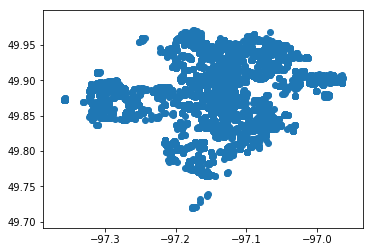

In [6]:
from shapely.geometry import Point

newgeom = [Point(x['coordinates']) for x in bikes.the_geom]
bikes['newgeom'] = newgeom
bikes = bikes.set_geometry('newgeom')
bikes.plot()

## bugs

In [7]:
import pandas as pd
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
bugs = client.get("du7c-8488", limit=2000)
bugs = GeoDataFrame(bugs)

# wrangling
idvars = ['count_date', 'trap_days']
location_only = [x for x in bugs.columns if "average" not in x]
location_only = [x for x in location_only if x not in idvars]
print(f"number of locations {len(location_only)}")

# make wide to long 
bugs = pd.melt(bugs[location_only + idvars], id_vars = idvars, var_name = 'location', value_name = 'bugcount')
bugs = GeoDataFrame(bugs)
bugs.head()

number of locations 37


,count_date,trap_days,location,bugcount
0,2015-05-04T00:00:00,3,north_east_1,0
1,2015-05-06T00:00:00,2,north_east_1,2
2,2015-05-08T00:00:00,2,north_east_1,0
3,2015-05-11T00:00:00,3,north_east_1,0
4,2015-05-13T00:00:00,2,north_east_1,1


buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.52426, 97.07156]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.818122, -97.165982]}
 }

In [8]:
buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.874801, -97.127406]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.823724, -97.177251]}
,"south_west_6": {"coord": [49.805538, -97.138229]}
,"south_west_7": {"coord": [49.781820, -97.178710]}
 }

In [9]:
temp = bugs.location.map(buglocations2gps)
newgeom = [shapely.geometry.Point(x['coord'][1], x['coord'][0]) for x in temp]
bugs = GeoDataFrame(bugs)
bugs['newgeom'] = newgeom
bugs = bugs.set_geometry('newgeom')
bugs.head()

,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
1,2015-05-06T00:00:00,2,north_east_1,2,POINT (-97.05930600000001 49.951867)
2,2015-05-08T00:00:00,2,north_east_1,0,POINT (-97.05930600000001 49.951867)
3,2015-05-11T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
4,2015-05-13T00:00:00,2,north_east_1,1,POINT (-97.05930600000001 49.951867)


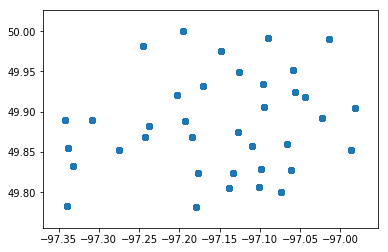

In [10]:
bugs.plot()

### map bugtrap to winnipeg neighbourhoods

In [11]:
bugsubset = bugs[bugs.count_date == bugs.count_date[0]]
print(bugsubset.shape)
bugsubset.head(1)

(37, 5)


,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)


In [129]:
hood = neighbourhoods.set_index('id').to_dict(orient='record')
bugloc = bugsubset[['location','newgeom']].set_index('location')
bugloc = bugloc['newgeom'] 
bugloc.head()
trap_in_neighbourhoods = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = [k for k,v in bugloc.to_dict().items() if hoodgeom.intersects(v)]
    #distance = GeoSeries.distance
    if dump != []:
        if len(dump) == 1:
            trap_in_neighbourhoods[name] = dump[0]


In [130]:
map_bugtraps_to_neighbourhoods = \
{v:k for k,v in trap_in_neighbourhoods.items()}

In [131]:
map_bugtraps_to_neighbourhoods

{'north_east_1': 'River East',
 'north_east_2': 'Rossmere-A',
 'north_east_3': 'Springfield South',
 'north_east_4': 'Talbot-Grey',
 'north_east_5': 'Transcona Yards',
 'north_east_6': 'Grassie',
 'north_east_7': 'Kildare-Redonda',
 'north_west_1': 'Crestview',
 'north_west_2': 'Deer Lodge',
 'north_west_3': 'Minto',
 'north_west_4': 'Brooklands',
 'north_west_5': 'Shaughnessy Park',
 'north_west_6': 'Rosser-Old Kildonan',
 'north_west_7': 'Templeton-Sinclair',
 'rural_ff': 'St. Vital Perimeter South',
 'rural_ii': 'Assiniboia Downs',
 'south_east_1': 'Norwood West',
 'south_east_2': 'Varennes',
 'south_east_3': 'Windsor Park',
 'south_east_4': 'Pulberry',
 'south_east_5': 'Meadowood',
 'south_east_6': 'Island Lakes',
 'south_east_7': 'River Park South',
 'south_west_1': 'West Perimeter South',
 'south_west_2': 'Eric Coy',
 'south_west_3': 'Assiniboine Park',
 'south_west_4': 'North River Heights',
 'south_west_5': 'Chevrier',
 'south_west_6': 'University',
 'south_west_7': 'South Poin

In [132]:
bugs['neighbourhood'] = bugs.location.map(map_bugtraps_to_neighbourhoods)
bugtrap = bugs
bugtrap.head(3).T

,0,1,2
count_date,2015-05-04T00:00:00,2015-05-06T00:00:00,2015-05-08T00:00:00
trap_days,3,2,2
location,north_east_1,north_east_1,north_east_1
bugcount,0,2,0
newgeom,POINT (-97.05930600000001 49.951867),POINT (-97.05930600000001 49.951867),POINT (-97.05930600000001 49.951867)
neighbourhood,River East,River East,River East


### neighbourhood with distance to each trap

In [133]:
def flatten(listoflist):
    oldlist = listoflist
    while type(oldlist) == list:
        newlist = list(itertools.chain(*oldlist))
        if len(newlist) == 1:
            oldlist = newlist
        else:
            return newlist

In [134]:
neighbourhoods.newgeom.shape

(237,)

In [146]:
neighbourhoods_geom_series = neighbourhoods.set_index('name')['newgeom']
print(neighbourhoods_geom_series.shape)
neighbourhoods_geom_series.head()

(237,)


name
Seven Oaks     POLYGON ((-97.11021888431701 49.925633193803, ...
Parker         POLYGON ((-97.17615035641499 49.850537882086, ...
The Maples     POLYGON ((-97.163398354858 49.941591371416, -9...
Luxton         POLYGON ((-97.116047777972 49.920325228662, -9...
Talbot-Grey    POLYGON ((-97.101068054847 49.904738664792, -9...
Name: newgeom, dtype: object

In [139]:
print(bugloc.shape)
bugloc.head()

(37,)


location
north_east_1    POINT (-97.05930600000001 49.951867)
north_east_2            POINT (-97.096341 49.933941)
north_east_3             POINT (-97.05633 49.924809)
north_east_4            POINT (-97.094797 49.906175)
north_east_5            POINT (-97.022426 49.892358)
Name: newgeom, dtype: object

In [155]:
[x for x in neighbourhoods_geom_series.items()][0]

('Seven Oaks', <shapely.geometry.polygon.Polygon at 0x7faa7e70a320>)

In [176]:
import geopandas
from geopandas import GeoSeries

In [178]:
GeoSeries([neighbourhoods_geom_series[0]], index= bugloc.index)

location
north_east_1    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_2    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_3    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_4    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_5    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_6    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_7    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_1    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_2    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_3    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_4    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_5    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_6    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_7    POLYGON ((-97.11021888431701 49.925633193803, ...
rural_aa        POLYGON ((-97.11021888431701 49.925633193803, ...
r

In [182]:
GeoSeries.distance(bugloc, 
                   GeoSeries([neighbourhoods_geom_series[0]], index= bugloc.index)
                  )

location
north_east_1    0.043155
north_east_2    0.007526
north_east_3    0.046994
north_east_4    0.024829
north_east_5    0.091720
north_east_6    0.060962
north_east_7    0.124259
north_west_1    0.189770
north_west_2    0.124492
north_west_3    0.081313
north_west_4    0.080163
north_west_5    0.047634
north_west_6    0.047348
north_west_7    0.014283
rural_aa        0.132540
rural_bb        0.099653
rural_cc        0.051961
rural_dd        0.100499
rural_ee        0.143982
rural_ff        0.130655
rural_gg        0.262004
rural_hh        0.228198
rural_ii        0.222377
south_east_1    0.053516
south_east_2    0.068834
south_east_3    0.079206
south_east_4    0.103973
south_east_5    0.097311
south_east_6    0.109957
south_east_7    0.119675
south_west_1    0.230894
south_west_2    0.170759
south_west_3    0.134674
south_west_4    0.086568
south_west_5    0.119065
south_west_6    0.123318
south_west_7    0.157775
dtype: float64

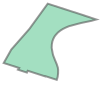

In [183]:
area_geom

In [184]:
from geopandas import GeoSeries
result = {}
for area_name, area_geom in neighbourhoods_geom_series.items():
    output = GeoSeries.distance(bugloc, 
                   GeoSeries([area_geom], index= bugloc.index)
                  )
    result[area_name] = output
    

In [202]:
distance_matrix_between_neighbourhood_and_bugtraps = \
pd.DataFrame(result)

In [203]:
distance_matrix_between_neighbourhood_and_bugtraps.head().T.head().T

,Agassiz,Airport,Alpine Place,Amber Trails,Archwood
location,,,,,
north_east_1,0.154652,0.157004,0.100539,0.101878,0.080319
north_east_2,0.121501,0.116964,0.076125,0.068894,0.052075
north_east_3,0.134564,0.155522,0.077276,0.109726,0.060350
north_east_4,0.097174,0.116791,0.048351,0.083888,0.024578
north_east_5,0.139302,0.189944,0.080246,0.153212,0.073227


In [207]:
df = distance_matrix_between_neighbourhood_and_bugtraps

In [217]:
winnipeg_areas = pd.DataFrame(neighbourhoods.set_index('name')['newgeom'])

In [247]:
import numpy as np
import pandas as pd
winnipeg_areas = pd.DataFrame(neighbourhoods.set_index('name')['newgeom'])
winnipeg_areas.index.name = 'area_name'
winnipeg_areas = winnipeg_areas.rename(columns = {'newgeom':'area_geom'})
df = distance_matrix_between_neighbourhood_and_bugtraps
winnipeg_areas['nearest_bugtrap'] = df.apply(pd.Series.argmin)
winnipeg_areas['nearest_bugtrap_geom'] \
= winnipeg_areas['nearest_bugtrap'].map(bugloc)
winnipeg_areas['nearest_bugtrap_distance'] = df.apply(np.min)
winnipeg_areas['area_intersects_bugtrap'] =\
[
    datum['nearest_bugtrap_geom'].intersects(datum['area_geom'])
    for area_name, datum in winnipeg_areas.iterrows()    
]
winnipeg_areas.head(1).T

/home/ruxi/miniconda3/envs/winnipeg/lib/python3.6/site-packages/pandas/core/frame.py:4933: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  labels=labels)


area_name,Seven Oaks
area_geom,"POLYGON ((-97.11021888431701 49.925633193803, ..."
nearest_bugtrap,north_east_2
nearest_bugtrap_geom,POINT (-97.096341 49.933941)
nearest_bugtrap_distance,0.00752645
area_intersects_bugtrap,False


In [246]:
[
    datum['nearest_bugtrap_geom'].intersects(datum['area_geom'])
    for area_name, datum in winnipeg_areas.iterrows()    
]

[False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 Fals

In [225]:
winnipeg_areas

,newgeom,closest_trap,distance_trap
name,,,
Seven Oaks,"POLYGON ((-97.11021888431701 49.925633193803, ...",north_east_2,0.007526
Parker,"POLYGON ((-97.17615035641499 49.850537882086, ...",south_west_4,0.019379
The Maples,"POLYGON ((-97.163398354858 49.941591371416, -9...",north_west_5,0.011644
Luxton,"POLYGON ((-97.116047777972 49.920325228662, -9...",north_east_2,0.016175
Talbot-Grey,"POLYGON ((-97.101068054847 49.904738664792, -9...",north_east_4,0.000000
North St. Boniface,"POLYGON ((-97.127307057463 49.891225692997, -9...",north_east_4,0.011900
Pulberry,"POLYGON ((-97.131878001327 49.835917500306, -9...",south_east_4,0.000000
Worthington,"POLYGON ((-97.092873006377 49.838256562904, -9...",south_east_5,0.006952
Bridgwater Lakes,"POLYGON ((-97.191591789505 49.809367059093, -9...",south_west_5,0.020292


In [219]:
winnipeg_areas

,newgeom,closest_trap
name,,
Seven Oaks,"POLYGON ((-97.11021888431701 49.925633193803, ...",north_east_2
Parker,"POLYGON ((-97.17615035641499 49.850537882086, ...",south_west_4
The Maples,"POLYGON ((-97.163398354858 49.941591371416, -9...",north_west_5
Luxton,"POLYGON ((-97.116047777972 49.920325228662, -9...",north_east_2
Talbot-Grey,"POLYGON ((-97.101068054847 49.904738664792, -9...",north_east_4
North St. Boniface,"POLYGON ((-97.127307057463 49.891225692997, -9...",north_east_4
Pulberry,"POLYGON ((-97.131878001327 49.835917500306, -9...",south_east_4
Worthington,"POLYGON ((-97.092873006377 49.838256562904, -9...",south_east_5
Bridgwater Lakes,"POLYGON ((-97.191591789505 49.809367059093, -9...",south_west_5


In [206]:
df.apply(pd.Series.argmin)

/home/ruxi/miniconda3/envs/winnipeg/lib/python3.6/site-packages/pandas/core/frame.py:4933: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  labels=labels)


Agassiz                       south_west_6
Airport                       north_west_2
Alpine Place                  south_east_2
Amber Trails                  north_west_6
Archwood                      south_east_2
Armstrong Point               south_west_4
Assiniboia Downs                  rural_ii
Assiniboine Park              south_west_3
Beaumont                      south_west_5
Betsworth                     south_west_2
Birchwood                     south_west_3
Booth                         south_west_3
Bridgwater Centre             south_west_7
Bridgwater Forest             south_west_5
Bridgwater Lakes              south_west_5
Bridgwater Trails             south_west_7
Broadway-Assiniboine          south_east_1
Brockville                    south_west_4
Brooklands                    north_west_4
Bruce Park                    north_west_2
Buchanan                      north_west_1
Buffalo                       south_west_5
Burrows Central               north_west_5
Burrows-Kee

## visualize maps

In [190]:
import folium

In [20]:
gps = [x['coord'] for x in buglocations2gps.values()]
gps[0]

[49.951867, -97.059306]

# other stuff

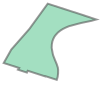

In [47]:
neighbourhoods.newgeom[0]

In [51]:
testhood = neighbourhoods.newgeom[0]
testhood.intersects(bugs.newgeom[0])

False

In [62]:
bugs.location.unique()

array(['north_east_1', 'north_east_2', 'north_east_3', 'north_east_4',
       'north_east_5', 'north_east_6', 'north_east_7', 'north_west_1',
       'north_west_2', 'north_west_3', 'north_west_4', 'north_west_5',
       'north_west_6', 'north_west_7', 'rural_aa', 'rural_bb', 'rural_cc',
       'rural_dd', 'rural_ee', 'rural_ff', 'rural_gg', 'rural_hh',
       'rural_ii', 'south_east_1', 'south_east_2', 'south_east_3',
       'south_east_4', 'south_east_5', 'south_east_6', 'south_east_7',
       'south_west_1', 'south_west_2', 'south_west_3', 'south_west_4',
       'south_west_5', 'south_west_6', 'south_west_7'], dtype=object)

In [68]:
bugsubset = bugs[bugs.count_date == bugs.count_date[0]]
print(bugsubset.shape)
bugsubset.head()

(37, 5)


,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
249,2015-05-04T00:00:00,3,north_east_2,2,POINT (-97.096341 49.933941)
498,2015-05-04T00:00:00,3,north_east_3,2,POINT (-97.05633 49.924809)
747,2015-05-04T00:00:00,3,north_east_4,0,POINT (-97.094797 49.906175)
996,2015-05-04T00:00:00,3,north_east_5,3,POINT (-97.022426 49.892358)


In [77]:
bugloc = bugsubset[['location','newgeom']].set_index('location')
bugloc.head()

,newgeom
location,
north_east_1,POINT (-97.05930600000001 49.951867)
north_east_2,POINT (-97.096341 49.933941)
north_east_3,POINT (-97.05633 49.924809)
north_east_4,POINT (-97.094797 49.906175)
north_east_5,POINT (-97.022426 49.892358)


In [96]:
df = neighbourhoods.set_index('id')
df.head()

,name,the_geom,newgeom
id,,,
696,Seven Oaks,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.11021888431701 49.925633193803, ..."
178,Parker,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.17615035641499 49.850537882086, ..."
630,The Maples,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.163398354858 49.941591371416, -9..."
702,Luxton,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.116047777972 49.920325228662, -9..."
1012,Talbot-Grey,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.101068054847 49.904738664792, -9..."


In [32]:
hood = neighbourhoods.set_index('id').to_dict(orient='record')
bugloc = bugsubset[['location','newgeom']].set_index('location')
bugloc.head()
result = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = [k for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)]
    #distance = GeoSeries.distance
    if dump != []:
        result[name] = dump


In [33]:
result

{'Assiniboia Downs': ['rural_ii'],
 'Assiniboine Park': ['south_west_3'],
 'Brooklands': ['north_west_4'],
 'Chevrier': ['south_west_5', 'south_west_7'],
 'Crestview': ['north_west_1'],
 'Deer Lodge': ['north_west_2'],
 'Eric Coy': ['south_west_2'],
 'Grassie': ['north_east_6'],
 'Island Lakes': ['south_east_6'],
 'Kildare-Redonda': ['north_east_7'],
 'Meadowood': ['south_east_5'],
 'Minto': ['north_west_3'],
 'North River Heights': ['south_west_4'],
 'Norwood West': ['south_east_1'],
 'Pulberry': ['south_east_4'],
 'River East': ['north_east_1'],
 'River Park South': ['south_east_7'],
 'Rosser-Old Kildonan': ['north_west_6'],
 'Rossmere-A': ['north_east_2'],
 'Shaughnessy Park': ['north_west_5'],
 'Springfield South': ['north_east_3'],
 'St. Vital Perimeter South': ['rural_ff'],
 'Talbot-Grey': ['north_east_4'],
 'Templeton-Sinclair': ['north_west_7'],
 'Transcona Yards': ['north_east_5'],
 'University': ['south_west_6'],
 'Varennes': ['south_east_2'],
 'West Perimeter South': ['south

In [183]:
hood = df.to_dict(orient='record')
result = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = {k:v for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)}
    #distance = GeoSeries.distance
    if dump != {}:
        result[name] = dump


In [186]:
len(bugloc)

37

In [206]:
hoodgeom_series = GeoSeries([hoodgeom for x in range(0, len(bugloc))])
hoodgeom_series.head()

0    POLYGON ((-97.071008132814 49.929370604903, -9...
1    POLYGON ((-97.071008132814 49.929370604903, -9...
2    POLYGON ((-97.071008132814 49.929370604903, -9...
3    POLYGON ((-97.071008132814 49.929370604903, -9...
4    POLYGON ((-97.071008132814 49.929370604903, -9...
dtype: object

In [215]:
hoodgeom_series.shape

(37,)

In [217]:
bugs.iloc[5]

count_date                     2015-05-15T00:00:00
trap_days                                        2
location                              north_east_1
bugcount                                         1
newgeom       POINT (-97.05930600000001 49.951867)
Name: 5, dtype: object

In [218]:
bugloc_series = bugloc['newgeom']
bugloc_series.head()


location
north_east_1    POINT (-97.05930600000001 49.951867)
north_east_2            POINT (-97.096341 49.933941)
north_east_3             POINT (-97.05633 49.924809)
north_east_4            POINT (-97.094797 49.906175)
north_east_5            POINT (-97.022426 49.892358)
Name: newgeom, dtype: object

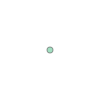

In [220]:
bugloc_series['north_east_1']

In [213]:
temp_hoodgeom_series = GeoSeries([hoodgeom for x in range(0, len(bugloc))], index = bugloc_series.index)
temp_hoodgeom_series.head()

location
north_east_1    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_2    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_3    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_4    POLYGON ((-97.071008132814 49.929370604903, -9...
north_east_5    POLYGON ((-97.071008132814 49.929370604903, -9...
dtype: object

In [214]:
GeoSeries.distance(bugloc_series, hoodgeom_series)

location
north_east_1    0.016572
north_east_2    0.025742
north_east_3    0.005385
north_east_4    0.033226
north_east_5    0.049609
north_east_6    0.016128
north_east_7    0.075568
north_west_1    0.240681
north_west_2    0.173538
north_west_3    0.128757
north_west_4    0.131806
north_west_5    0.099467
north_west_6    0.089433
north_west_7    0.058642
rural_aa        0.181514
rural_bb        0.142491
rural_cc        0.061496
rural_dd        0.069780
rural_ee        0.103360
rural_ff        0.126502
rural_gg        0.306202
rural_hh        0.277623
rural_ii        0.273520
south_east_1    0.402220
south_east_2    0.082242
south_east_3    0.067132
south_east_4    0.122343
south_east_5    0.103824
south_east_6    0.098959
south_east_7    0.126030
south_west_1    0.278735
south_west_2    0.218176
south_west_3    0.182378
south_west_4    0.128607
south_west_5    0.146275
south_west_6    0.140901
south_west_7    0.142775
dtype: float64

In [181]:
GeoSeries.distance(bugs.newgeom, neighbourhoods.newgeom)

0       0.043155
1       0.134963
2       0.100383
3       0.057274
4       0.050027
5       0.067987
6       0.125571
7       0.111837
8       0.194437
9       0.025912
10      0.083309
11      0.090592
12      0.111136
13      0.056674
14      0.072437
15      0.079613
16      0.063291
17      0.162240
18      0.092837
19      0.209310
20      0.039239
21      0.106377
22      0.047638
23      0.247477
24      0.049767
25      0.037765
26      0.066041
27      0.167527
28      0.025783
29      0.095835
          ...   
9183         NaN
9184         NaN
9185         NaN
9186         NaN
9187         NaN
9188         NaN
9189         NaN
9190         NaN
9191         NaN
9192         NaN
9193         NaN
9194         NaN
9195         NaN
9196         NaN
9197         NaN
9198         NaN
9199         NaN
9200         NaN
9201         NaN
9202         NaN
9203         NaN
9204         NaN
9205         NaN
9206         NaN
9207         NaN
9208         NaN
9209         NaN
9210         N

In [157]:
GeoSeries.distance

<function geopandas.base.GeoPandasBase.distance>

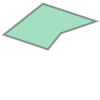

In [158]:
hoodgeom

In [170]:
bugeom = bugloc.to_dict()['newgeom']['north_east_1']

In [172]:
print(bugeom)

POINT (-97.05930600000001 49.951867)


In [173]:
print(hoodgeom)

POLYGON ((-97.071008132814 49.929370604903, -97.06197803790199 49.926365512212, -97.059358366453 49.929646470629, -97.052099365226 49.932114247383, -97.052329448663 49.932190856964, -97.062644119052 49.935595491879, -97.062798686409 49.93564650044, -97.062989585604 49.935709869484, -97.063080098318 49.935638243655, -97.071008132814 49.929370604903))


In [175]:
GeoSeries.distance( hoodgeom, bugeom)

AttributeError: 'Polygon' object has no attribute 'geometry'

In [150]:
bugloc.to_dict()['newgeom']

{'north_east_1': <shapely.geometry.point.Point at 0x7f17746235c0>,
 'north_east_2': <shapely.geometry.point.Point at 0x7f1774946be0>,
 'north_east_3': <shapely.geometry.point.Point at 0x7f177484c358>,
 'north_east_4': <shapely.geometry.point.Point at 0x7f1774788a90>,
 'north_east_5': <shapely.geometry.point.Point at 0x7f177466e208>,
 'north_east_6': <shapely.geometry.point.Point at 0x7f177469f940>,
 'north_east_7': <shapely.geometry.point.Point at 0x7f17746150b8>,
 'north_west_1': <shapely.geometry.point.Point at 0x7f17745447f0>,
 'north_west_2': <shapely.geometry.point.Point at 0x7f1774466f28>,
 'north_west_3': <shapely.geometry.point.Point at 0x7f17743e86a0>,
 'north_west_4': <shapely.geometry.point.Point at 0x7f177440cdd8>,
 'north_west_5': <shapely.geometry.point.Point at 0x7f177434b550>,
 'north_west_6': <shapely.geometry.point.Point at 0x7f17749b0c88>,
 'north_west_7': <shapely.geometry.point.Point at 0x7f1774b41048>,
 'rural_aa': <shapely.geometry.point.Point at 0x7f1774d159b0>,

In [153]:
{k:v for k,v in bugloc.to_dict()['newgeom'].items() if hoodgeom.intersects(v)
}

{}

In [143]:
hoodgeom.intersects(bugloc.newgeom[0])

False

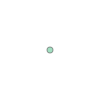

In [141]:
bugloc.newgeom[0]

In [124]:
from geopandas import GeoSeries

In [49]:
testhood.intersects(bugs.newgeom[0])

False

In [46]:
bugs.newgeom[0] in neighbourhoods.newgeom[0]

TypeError: argument of type 'Polygon' is not iterable

In [14]:
import shapely.geometry
def transform_geometry_json_to_object(the_geom, 
                                      geom_type = "type",
                                      coord_varname = 'coordinates'
                                     ):
    result = []
    for datum in the_geom:
        geom_type    = datum[geom_type]
#         coord_values = datum[coord_varname]
#         if geom_type == 'MultiPolygon':
#             geom_type = 'Polygon'
#         geomfxn = getattr(shapely.geometry, geom_type)
#         output = geomfxn(coord_values)
#         result.append(output)


transform_geometry_json_to_object(bikes.the_geom)

KeyError: 'Point'